# Setup

In [1]:
import os 
import glob
import pandas as pd
import numpy as np
import wfdb
import cv2
import matplotlib.pyplot as plt
%matplotlib notebook


# Check Unique Beat Count

In [2]:
ROOT_DIR = os.path.abspath("./")
ROOT_DIR

'F:\\NSU\\CSE\\cse499\\New folder\\Multiple Beat Segmentation'

In [3]:
DATA_PATH = os.path.join(ROOT_DIR, "data/")
DATA_PATH

'F:\\NSU\\CSE\\cse499\\New folder\\Multiple Beat Segmentation\\data/'

In [4]:
directory = os.path.join(ROOT_DIR, "multiple_beats")
directory

'F:\\NSU\\CSE\\cse499\\New folder\\Multiple Beat Segmentation\\multiple_beats'

In [5]:
# patient_list = ['100','101','102','103','104','105','106','107',
#                 '108','109','111','112','113','114','115','116',
#                 '117','118','119','121','122','123','124','200',
#                 '201','202','203','205','207','208','209','210',
#                 '212','213','214','215','217','219','220','221',
#                 '222','223','228','230','231','232','233','234']


In [76]:
file = DATA_PATH + '112'
file

'F:\\NSU\\CSE\\cse499\\New folder\\Multiple Beat Segmentation\\data/112'

In [77]:
abnormal = ['L','R','V','/','A','f','F','j','a','E','J','e','S']

In [78]:
def load_ecg(file):
    record = wfdb.rdrecord(file)
    annotation = wfdb.rdann(file, 'atr')
    
    # Extract the signal
    p_signal = record.p_signal
    
    # Verify frequency is 360
    assert record.fs == 360, 'sample freq is not 360'
    
    # Extract symbols and annotation index
    atr_sym = annotation.symbol
    atr_sample = annotation.sample
    
    return p_signal, atr_sym, atr_sample

In [79]:
p_signal, atr_sym, atr_sample = load_ecg(file)


In [80]:
p_signal

array([[-0.75 , -0.62 ],
       [-0.75 , -0.62 ],
       [-0.75 , -0.62 ],
       ...,
       [-0.825, -0.59 ],
       [-0.81 , -0.58 ],
       [-1.28 ,  0.   ]])

In [81]:
values, counts = np.unique(atr_sym, return_counts=True)
for v,c in zip(values, counts):
    print(v,c)

+ 1
A 2
N 2537
~ 10


In [82]:
# Get Normal beat Index
ids = np.in1d(atr_sym, 'N')
imp_beats = atr_sample[ids]
imp_beats= imp_beats[0:20]
imp_beats

array([ 124,  382,  644,  892, 1149, 1393, 1648, 1891, 2147, 2392, 2630,
       2880, 3128, 3377, 3622, 3871, 4119, 4368, 4624, 4871])

In [83]:
# Get abnormal beat index
ab_index = [b for a,b in zip(atr_sym,atr_sample) if a in abnormal]
ab_index = ab_index[0:20]
ab_index

[253598, 278493]

In [84]:
x = np.arange(len(p_signal))
x

array([     0,      1,      2, ..., 649997, 649998, 649999])

In [85]:
#normalbeats
start = imp_beats[0]
end = imp_beats[10]
start, end

(124, 2630)

In [71]:
# ab normalbeats
# start = ab_index[0]
# end = ab_index[10]+250
# start, end

(111, 2685)

In [87]:
count=129

<IPython.core.display.Javascript object>


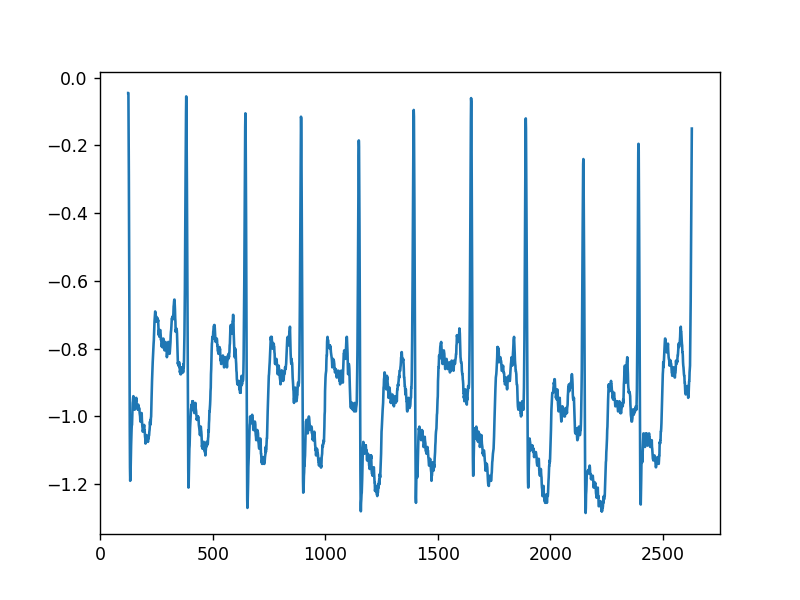

In [86]:
plt.plot(x[start:end], p_signal[start:end,0])

In [ ]:
plt.figure(frameon=False)
plt.plot(x[start:end], p_signal[start:end,0])
    
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
filename = directory + '/' + str(count) + '.png'
        
plt.savefig(filename)
plt.close()
    
im_gray = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
im_gray = cv2.resize(im_gray, (1000, 1000), interpolation = cv2.INTER_LANCZOS4)
cv2.imwrite(filename, im_gray)